<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Nature_Inspired_Computing_Labs/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parameters

we can initialize the velocity randomly or with zero

## Neighborhoods
PSO papers indicates that smaller neighborhoods (as small as two) provide better global behavior and avoid local minima,
while larger neighborhoods provide faster convergence

- Smaller neighborhood -> better global behavior
- Bigger neighborhood -> faster convergence

## Learning rates
maximum learning rates ${\phi}_{1, max}$ and ${\phi}_{2, max}$
- Cognition learning rate ${\phi}_{1, max}$
- Social learning rate ${\phi}_{2, max}$

Often set to about 2.05


## Velocity
Suggest setting $v_{max}$ to between $10\%$ and $20\%$ of the search space range

### Inertia
where w is the inertia weight, which often decreases from about 0.9 at the first
generation to about 0.4 at the last generation


## Position
We usually implement some type of limiting operation to keep X within
the search domain

## Notes
- **Linear PSO**, where ${\phi_1}$ and ${\phi_2}$ are scalars instead of vectors,
 generally considered to providing worse performance than the standard algorithm
- **Elitism**
- **Topologies**
- **Fully Informed PSO** Why not allow every individual in the population to
contribute to the velocity update?
- https://gh.fakev.cn/guofei9987/scikit-opt

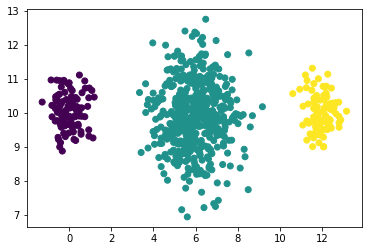

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=[100, 500, 100], centers=[(0, 10), (6, 10), (12, 10)], n_features=2,
                  cluster_std=[0.5, 1, 0.5], random_state=0)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

[[ 5.97971492e+00  9.93294293e+00]
 [ 1.19566500e+01  1.00176949e+01]
 [-4.78840902e-04  1.00713893e+01]]


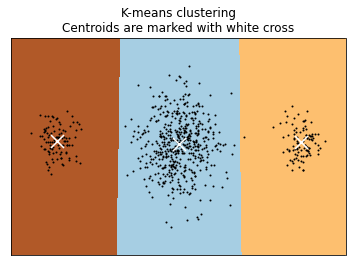

In [ ]:
# based on: hhttps://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
print(f'{centroids}')
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [1]:
!pip install scikit-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


best_x is  [0.   0.05 0.5 ] best_y is [0.25]


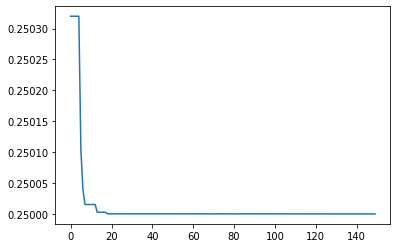

In [ ]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2

from sko.PSO import PSO

pso = PSO(func=demo_func, n_dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()


Recall Ackley function

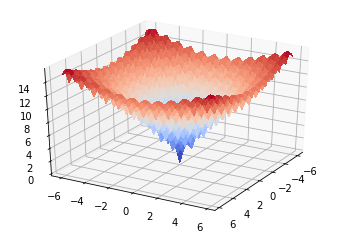

In [4]:
from matplotlib import cm

def ackley(x, y):
 return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
        np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) +\
        np.e + 20

X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ackley(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 30)  # Change to explore the surface
plt.show()

Iter: 0, Best fit: [18.36143143] at [13.08176501  7.17631428]
Iter: 1, Best fit: [18.36143143] at [13.08176501  7.17631428]
Iter: 2, Best fit: [14.91319203] at [-7.31523884  1.78343345]
Iter: 3, Best fit: [8.69904552] at [2.83257009 1.28782135]
Iter: 4, Best fit: [8.69904552] at [2.83257009 1.28782135]
Iter: 5, Best fit: [6.02287518] at [ 0.82267278 -1.85112195]
Iter: 6, Best fit: [6.02287518] at [ 0.82267278 -1.85112195]
Iter: 7, Best fit: [3.06776876] at [ 0.22331533 -0.35449309]
Iter: 8, Best fit: [3.06776876] at [ 0.22331533 -0.35449309]
Iter: 9, Best fit: [1.47593615] at [0.17260754 0.11826965]
Iter: 10, Best fit: [1.47593615] at [0.17260754 0.11826965]
Iter: 11, Best fit: [1.47593615] at [0.17260754 0.11826965]
Iter: 12, Best fit: [1.47593615] at [0.17260754 0.11826965]
Iter: 13, Best fit: [1.42985243] at [-0.01491713  0.20855123]
Iter: 14, Best fit: [1.42985243] at [-0.01491713  0.20855123]
Iter: 15, Best fit: [1.42985243] at [-0.01491713  0.20855123]
Iter: 16, Best fit: [1.4298

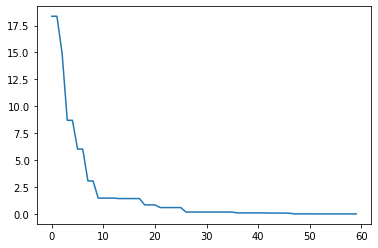

In [3]:
# let's try to find the minimum
# particle
import numpy as np
from sko.PSO import PSO
def demo_func(particle):
    x, y = particle[0], particle[1]
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
        np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) +\
        np.e + 20


pso = PSO(func=demo_func, n_dim=2, pop=15, max_iter=60,
          lb=-20, ub=20, w=0.8, c1=0.5,
          c2=0.5, verbose=True,
          )
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# %% Plot the result
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()


## Let's look at some implementation details

# Self-Study
- What is stability in PSO?
- What is fully Informed PSO?
- What is "new PSO" or "negative reinforcement PSO" NPSO?
- What is stagnation and how to counter it?
- How can PSO benefit from K-means